In [15]:
import pandas as pd

df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
null_rows = df[df.isnull().any(axis=1)]

print(null_rows.index)

Index([], dtype='int64')


In [3]:
df = df.drop(columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

In [19]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for column in categorical:
    df[column] = le.fit_transform(df[column])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [28]:
X=df.iloc[:, 1:].values
y=df.iloc[:, 0].values

In [21]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X, y)

LinearRegression()

In [22]:
pred=model.predict(X)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import math

rmse=math.sqrt(mean_squared_error(y, pred))
r2=r2_score(y, pred)
print(rmse)
print(r2)

1056995.064075431
0.680069137617004


In [35]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"y={slope}x+{intercept}")

y=243.90688726890787x+101866.51305206586


C:\Users\josep\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


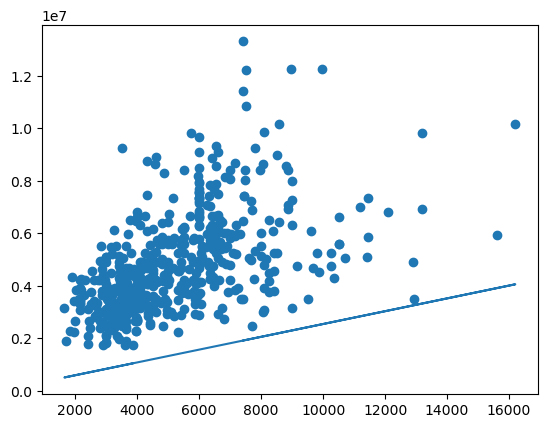

In [38]:
import matplotlib.pyplot as plt

pred = model.predict(X)

plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], X[:, 0]*slope+intercept)

In [42]:
X=df['area'].values
y=df['price'].values

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [56]:
pred = model.predict(X_test.reshape(-1,1))

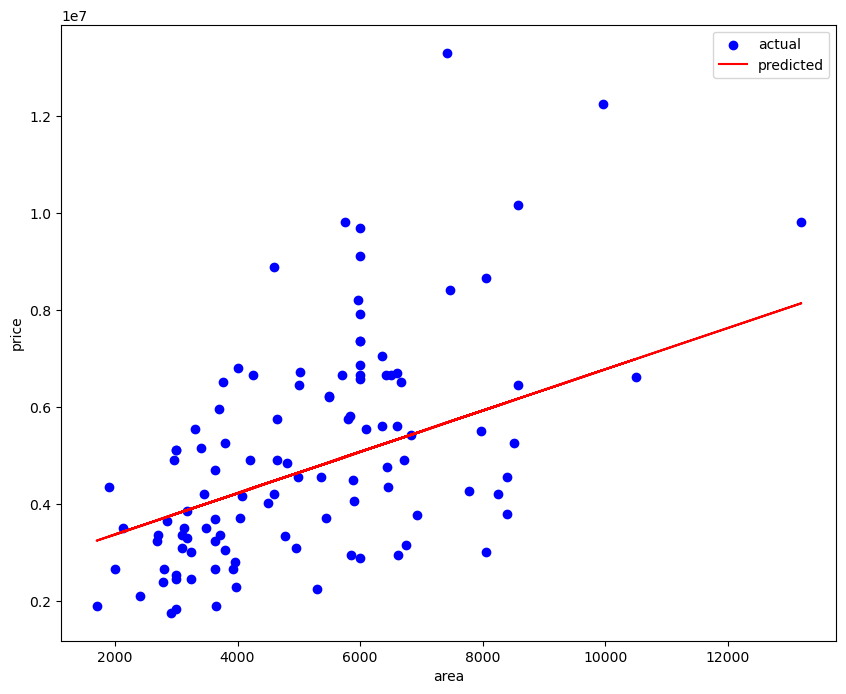

In [58]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,y_test,color='blue',label='actual')
plt.plot(X_test,pred,color='red',label='predicted')
plt.xlabel('area')
plt.ylabel('price')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
import math

rmse=math.sqrt(mean_squared_error(y_test, pred))
r2=r2_score(y_test, pred)
print(rmse)
print(r2)

1917103.7021424233
0.27287851871974644
